<h2 style="color:turquoise">LAB 01 ASSIGNMENT: COLOR COMPRESSION</h2>
<h3 style="color:red">CARRIED OUT BY: 21127031 - PHAM QUOC DUY</h3>
<h3 style="color:green">LICENSE: VIETNAM NATIONAL UNIVERSITY - HCM UNIVERSITY OF SCIENCE</h3>

In [741]:
### Libraries used in project
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import copy

In [742]:
#----------------------------------------------------------------------------------------------------------
#Function: kmeans: implementation of kmeans clustering algorithm

#Paramenters:
#img: original image in the form of np.ndarray with shape of (height*width, num_channels)
#k_clusters: number of clusters
#max_iter: maximum number of iterations
#init_centroids: the way to initiate centroids: random or in_pixel
#initial_shape: shape of the original picture array

#Returns:
#centroids: color centroids in the form of np.ndarray with the shape of (height*width,)
#labels: label for pixels (cluster's index on which the pixel belong)
#----------------------------------------------------------------------------------------------------------

def kmeans(img, k_clusters, max_iter, init_centroids, initial_shape):
    labels = np.empty((initial_shape[0]*initial_shape[1], ), dtype=int)
    
    if init_centroids == 'random':
        centroids = np.random.randint(low=0, high=256, size=(k_clusters,3))
    elif init_centroids == 'in_pixel':
        uniq_c = np.unique(img)
        centroids = np.random.choice(uniq_c, size=(k_clusters, 3))
    else:
        print('Unexpected case passed to init_centroids, try again')
        return
    
    for i in range(max_iter): #if the maximum number of iterations is reached, stop and return 
        distances = np.array([np.linalg.norm((img[:, np.newaxis] - centroids), axis=2)]).reshape((initial_shape[0]*initial_shape[1], k_clusters))
        labels = np.argmin(distances, axis=1)
        
        uniq_label = np.unique(labels)
        while not np.array_equal(uniq_label, np.arange(0, k_clusters, 1)): #signals that one or more of the centroids are not classified into the image
            centroids = np.random.randint(low=0, high=255, size=(k_clusters,3))
            distances = np.array([np.linalg.norm((img[:, np.newaxis] - centroids), axis=2)]).reshape((initial_shape[0]*initial_shape[1], k_clusters))
            labels = np.argmin(distances, axis=1)
            uniq_label = np.unique(labels)
        
        last_centroids = copy.deepcopy(centroids)
        tmp_new_centroids = np.array([])
        
        for j in range(k_clusters):
            centroid_id = (labels == j)
            color_vectors = img[centroid_id] #picking out the color vectors that belong to the centroid
            
            ci = np.mean(color_vectors, axis=0, dtype=int)
            tmp_new_centroids = np.append(tmp_new_centroids, ci, axis=0)
            
        new_centroids = tmp_new_centroids.reshape(centroids.shape)
        
        centroids = new_centroids
        
        if np.allclose(new_centroids, last_centroids, rtol=0.05, atol=0.05): 
            break
    
    return centroids, labels      

In [743]:
#----------------------------------------------------------------------------------------------------------
#Function: image_reconstruct: rebuild image from centroids and labels

#Parameters:
#img: original image in the form of np.ndarray with shape of (height*width, num_channels)
#k_clusters: number of clusters
#max_iter: maximum number of iterations
#init_centroids: the way to initiate centroids: random or in_pixel
#initial_shape: shape of the original picture array

#Returns: recovered_img: recovered image in the form of an Image object
#----------------------------------------------------------------------------------------------------------
def image_reconstruct(image, k_clusters, max_iter, init_centroids, initial_shape):
    centroids,labels = kmeans(image, k_clusters, max_iter, init_centroids, initial_shape)
    
    img = centroids[labels]
    recovered_img_arr = img.reshape(initial_shape).astype(np.uint8)
    
    recovered_img = Image.fromarray(recovered_img_arr)
    return recovered_img

#----------------------------------------------------------------------------------------------------------
#Function: show_image: show image

#Parameters: 
#cluster: number of clusters
#original_image: original image in the form of Image object
#recovered_image: recovered image in the form of Image object

#Returns: None
#----------------------------------------------------------------------------------------------------------
def show_image(cluster, original_image, recovered_image):
    pics = plt.subplots(1, 2, figsize=(15,10))[1]
    
    pics[0].axis("off")
    pics[0].set_title("Original")
    pics[0].imshow(original_image)
    
    pics[1].axis("off")
    pics[1].set_title("Image compressed with {} clusters".format(cluster))
    pics[1].imshow(recovered_image)
    
    plt.show()  
    
#----------------------------------------------------------------------------------------------------------
#Function: save_image: save image in the desired format

#Parameters:
#img: Image object
#img_name: name of the image
#output_format: the format of the output
#cluster_num: number of clusters    

#Returns: None
#----------------------------------------------------------------------------------------------------------
def save_image(img, img_name, output_format, cluster_num):
    seperator = img_name.index('.')
    name = img_name[:seperator]
    img.save(f"{name}_{str(cluster_num)} clusters.{output_format}")
    

In [744]:
#----------------------------------------------------------------------------------------------------------
#Function: get_input: receives input from the user

#Parameters: None

#Returns:
#pic_name: name of image
#output_format: format selected for image export
#init: way to initiate centroids
#----------------------------------------------------------------------------------------------------------

def get_input():
    print("Enter the name of the picture, including the extension (e.g: picture.png)")
    pic_name = input()
    
    print('Enter the format of the output picture (pdf or png)')
    output_format = input()
    
    while output_format != 'pdf' and output_format != 'png':
        print('Invalid output format, try again')
        output_format = input()
        
    print('Enter the way to initiate the centroids (random or in_pixel): ')
    init = input()
    
    while init != 'random' and init != 'in_pixel':
        print('Invalid cluster initiation format, try again')
        init = input()
        
    return pic_name, output_format, init

#put this line of code inside the main function if you want to only run the main function
#note: input time will be added to the runtime if done so

#pic_name, output_format, init_clusters = get_input()

#Main function
def main():
    #put this line of code outside the main function if you want to seperate the runtime of input and the algorithm
    #for easier measurements
    pic_name, output_format, init_clusters = get_input()
    
    picture = Image.open(pic_name)
    pic_array = np.array(picture)

    initial_shape = pic_array.shape
    flat_img = pic_array.reshape((initial_shape[0]*initial_shape[1],3))
    clusters = [3,5,7,9,11] #configure the number of clusters here
    max_iter = 1000 #configure the maximum number of iterations here
    
    for c in clusters:
        recov_img = image_reconstruct(flat_img, c, max_iter, init_clusters, initial_shape)
        show_image(c, picture, recov_img)
        save_image(recov_img, pic_name, output_format, c)

Enter the name of the picture, including the extension (e.g: picture.png)
Enter the format of the output picture (pdf or png)
Enter the way to initiate the centroids (random or in_pixel): 


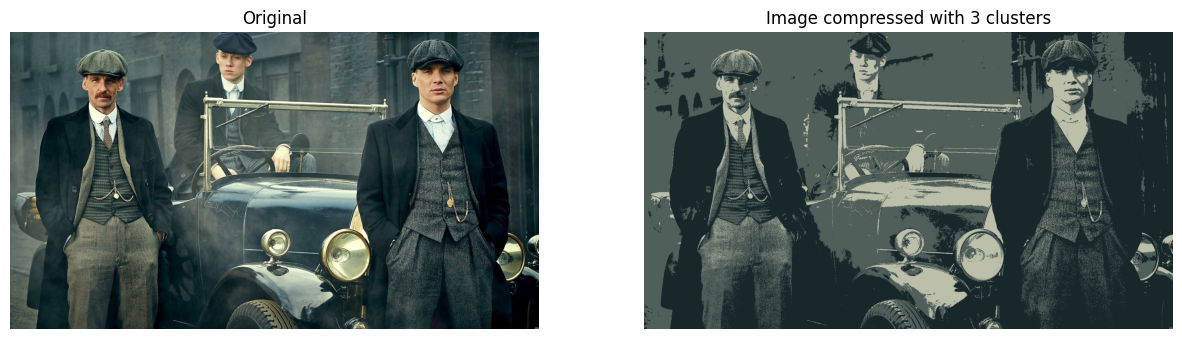

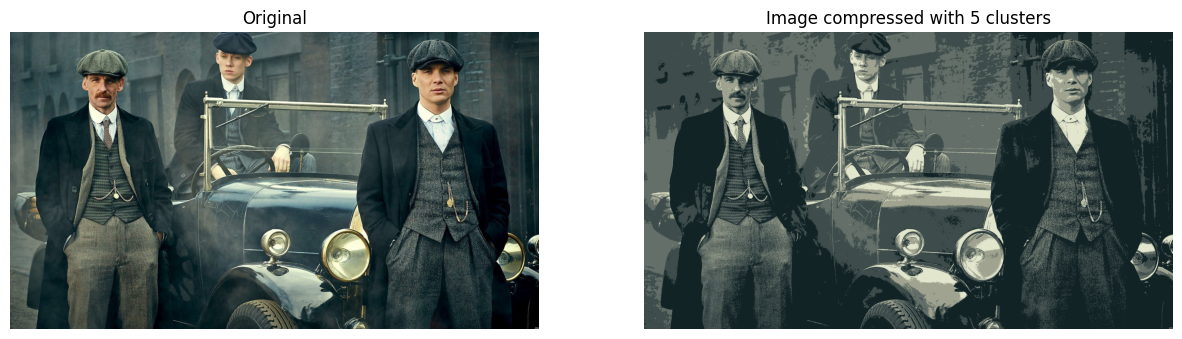

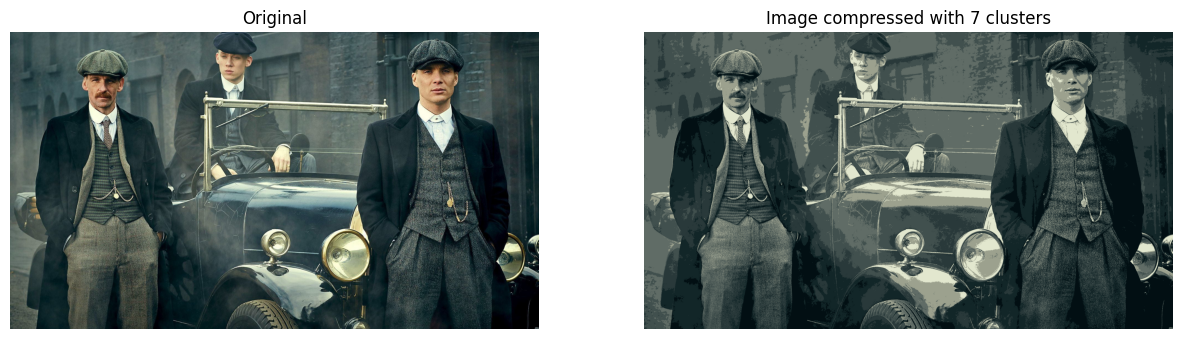

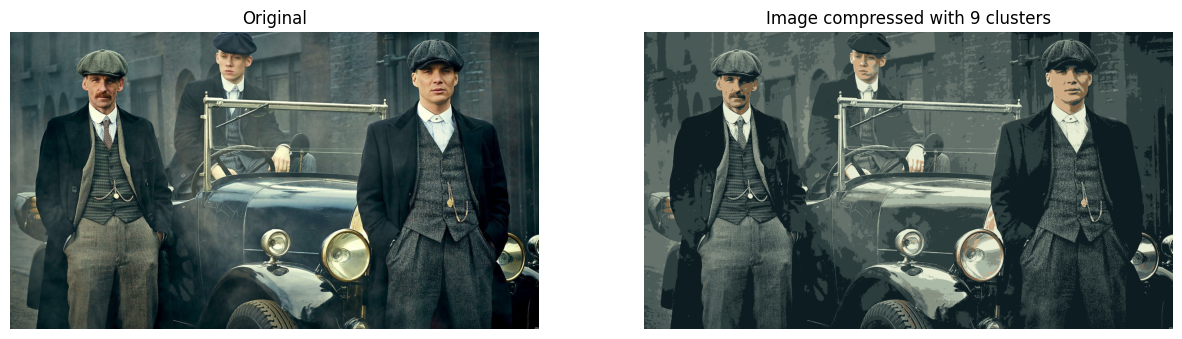

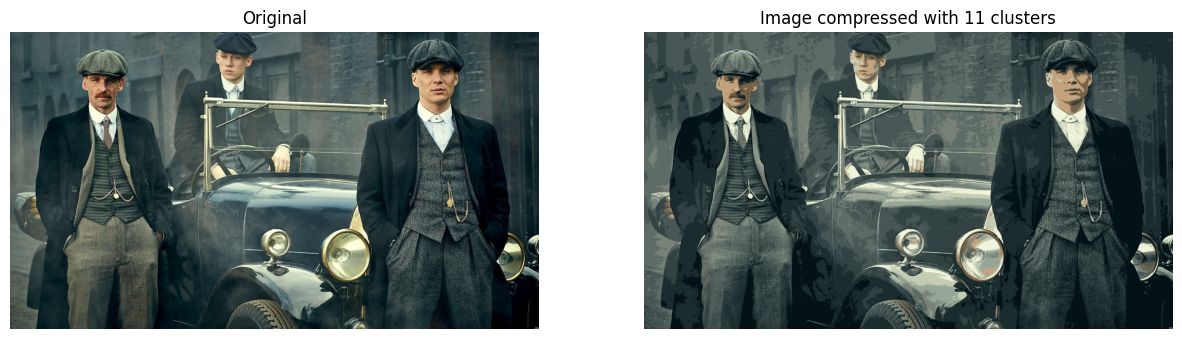

In [745]:
if __name__ == "__main__":
    main()